# Named Entity Recognition

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
import seaborn as sns
import string # special operations on strings
import spacy # language models
from nltk import tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [2]:
book=pd.read_csv("D:/ExcelR/Data Science(Andheri-Sadanand-Chirag)(21st Aug 2021)/Data Set Files/21.apple.txt",
                 error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 14\n'


In [3]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [4]:
#Entity Tagging
nlp = spacy.load('en_core_web_sm')
one_block = book[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)# style="dep"(POS)&"ent"(NER)

In [5]:
one_block

"Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment

In [6]:
#parts of speech 
for token in doc_block[0:15]:
    print(token,"-", token.pos_)

Finally - ADV
a - DET
MacBook - PROPN
possession - NOUN
. - PUNCT
Got - VERB
it - PRON
in - ADP
50k - NOUN
in - ADP
Diwali - PROPN
sale - NOUN
. - PUNCT
Technically - ADV
good - ADJ


In [7]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['product', 'niche', 'technology', 'battery', 'life', 'machine', 'laptops', 'crash', 'become', 'years', 'virus', 'required', 'security', 'data', 'transactions', 'sense', 'possession', 'pride', 'Problems', 'switching']


In [8]:
#Counting tokens again
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,issues,4
1,buy,3
2,possession,2
3,laptops,2
4,data,2
5,problems,2
6,cd,2
7,apps,2
8,compatibility,2
9,clarity,2


**Visualization**

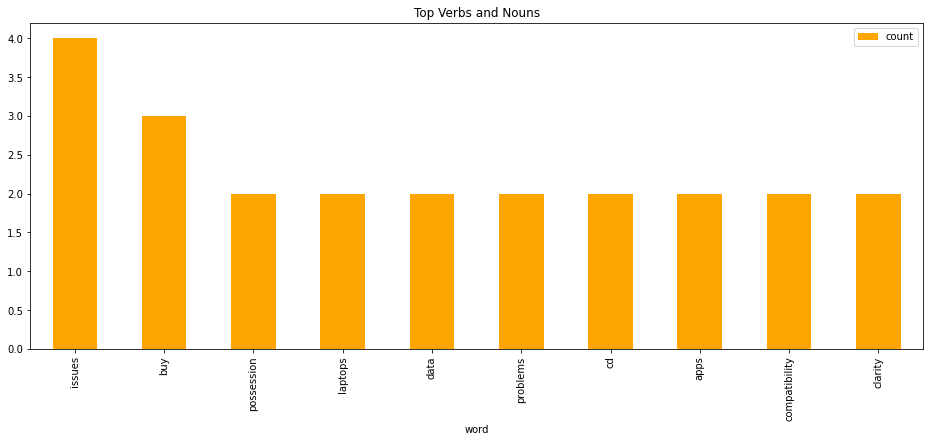

In [9]:
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(16,6), title='Top Verbs and Nouns',color="orange");

#### Emotion Mining

In [10]:
#Sentiment analysis
afinn = pd.read_csv('D:/ExcelR/Data Science(Andheri-Sadanand-Chirag)(21st Aug 2021)/Data Set Files/22.Afinn.csv', 
                    sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [11]:
#scores assigned to each word
afinn.head(6)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2


In [12]:
#preprocessing of the data 
book=pd.read_csv("D:/ExcelR/Data Science(Andheri-Sadanand-Chirag)(21st Aug 2021)/Data Set Files/21.apple.txt",
                 error_bad_lines=False)
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

b'Skipping line 6: expected 1 fields, saw 14\n'


In [13]:
#tokenize into sentences
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[:5]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.",
 'Got it in 50k in Diwali sale.',
 'Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.',
 'Terrific sense of possession & pride.Bad News.',
 'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!']

In [14]:
#review to individual sentences
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [15]:
#creating a dictionary for affin scores
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [16]:
#Custom function :score each word in a sentence in lemmatised form,but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores
# user defined function to calculate aggregate scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [17]:
# test scores
calculate_sentiment(text ="bad") #negative sentiment

-3

In [18]:
#sentiment on whole text
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [19]:
sent_df

,sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
182,You can get one of the best movie experiences ...,3
183,Overall I would it a 4.5/5.,0
184,"I got a great deal on this laptop, which I hav...",3
185,I got it not only on discount but also was abl...,0


In [20]:
# how many words are in the sentence?
sent_df[['word_count']] = sent_df['sentence'].str.split().apply(len)
sent_df[['word_count']].head(10)

,word_count
0,17
1,7
2,31
3,7
4,65
5,7
6,47
7,16
8,29
9,26


In [21]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
142,Except for not so good sound quality while wat...,5,19
128,Display is too good and it feels like butter o...,5,12
179,great product The elegant work of apple can be...,5,13
64,I hope this comment can help to save somebody’...,6,10
103,The switch was inspired by the awesome reviews...,6,13
46,Ships with macOS sierra but update is availabl...,6,86
59,I use this for music production and it works a...,7,30
0,It's amazing..... battery last around 10 -12 h...,7,17
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [22]:
# Sentiment score of the whole review
sent_df[['sentiment_value']].describe()

,sentiment_value
count,187.000000
mean,0.903743
std,3.387411
min,-11.000000
25%,-1.000000
50%,0.000000
75%,3.000000
max,24.000000


In [23]:
# Sentiment score of the whole review # positive/above zero scores
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [24]:
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value,word_count
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184
151,..So now I m working with the external keyboar...,17,113


In [25]:
sent_df['index']=range(0,len(sent_df))

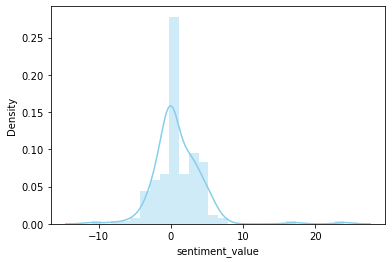

In [26]:
sns.distplot(sent_df['sentiment_value'],color="skyblue");

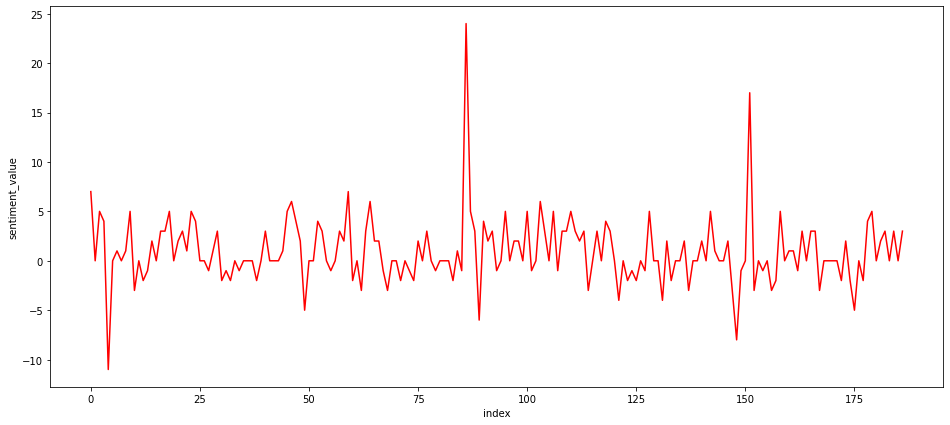

In [27]:
plt.figure(figsize=(16, 7))
sns.lineplot(y='sentiment_value',x='index',data=sent_df,color="red");

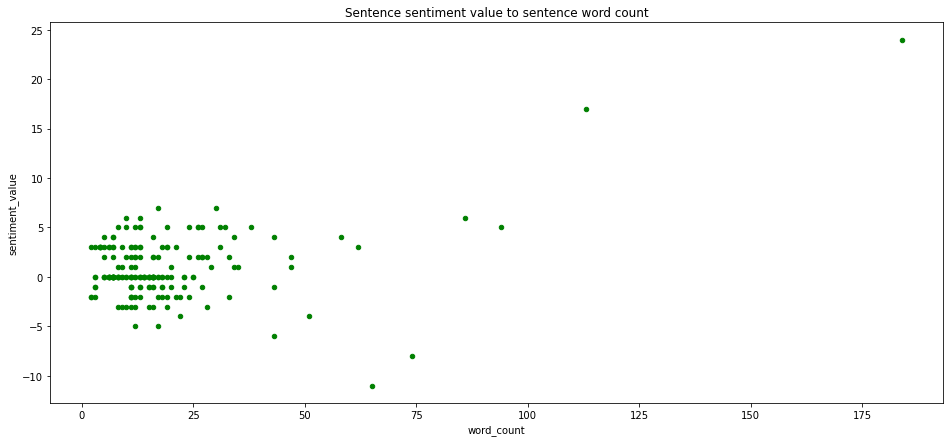

In [28]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(16,7),title='Sentence sentiment value to sentence word count',color="g");